In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np
import random

In [ ]:
folder_path = "/content/drive/MyDrive/Advanced_Deep_Learning/Midterm/Data/LP_detection/LP_detection"
image_train_path = os.path.join(folder_path, "images/train")
label_train_path = os.path.join(folder_path, "labels/train")
image_files = os.listdir(image_train_path)
random.shuffle(image_files)
selected_images = []
for image_file in image_files:
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(label_train_path, label_file)
    if os.path.exists(label_path):
        selected_images.append((image_file, label_path))
    if len(selected_images) >= 12:
        break
for image_file, label_path in selected_images:
    image_path = os.path.join(image_train_path, image_file)
    image = cv2.imread(image_path)
    with open(label_path, "r") as f:
        label_line = f.readline()
        label_values = label_line.strip().split()
        class_id, x_center, y_center, width, height = map(float, label_values)
        img_height, img_width, _ = image.shape
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

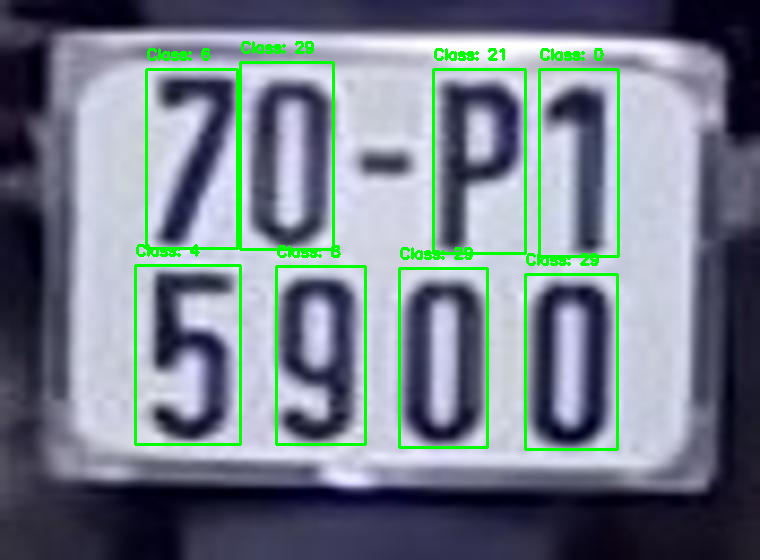

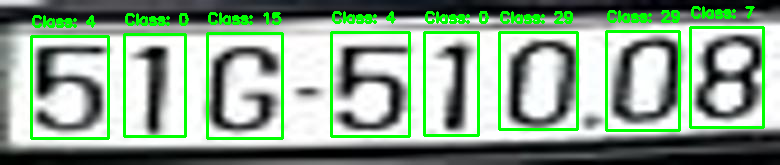

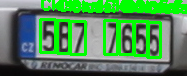

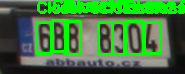

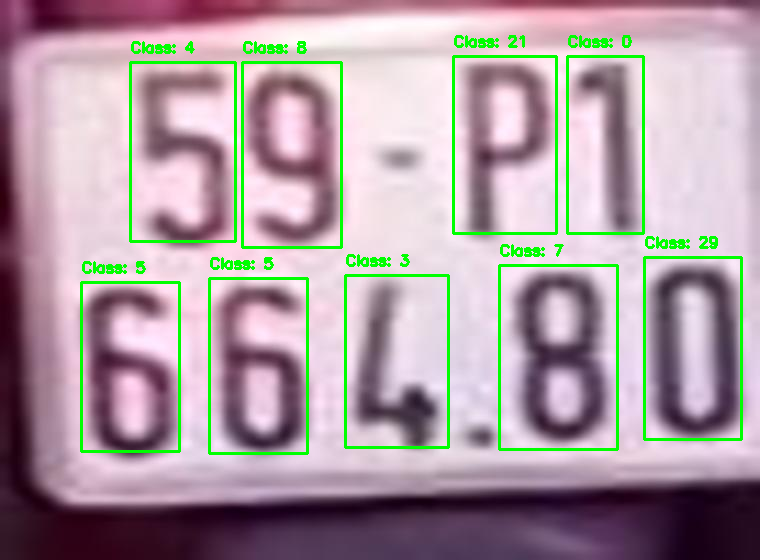

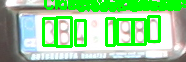

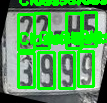

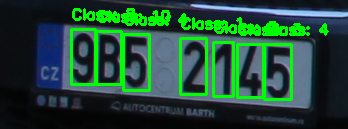

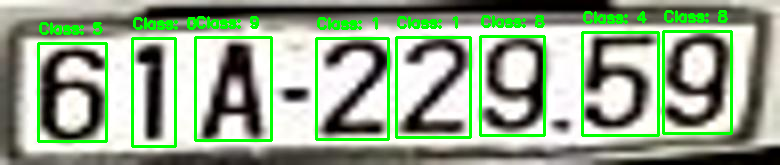

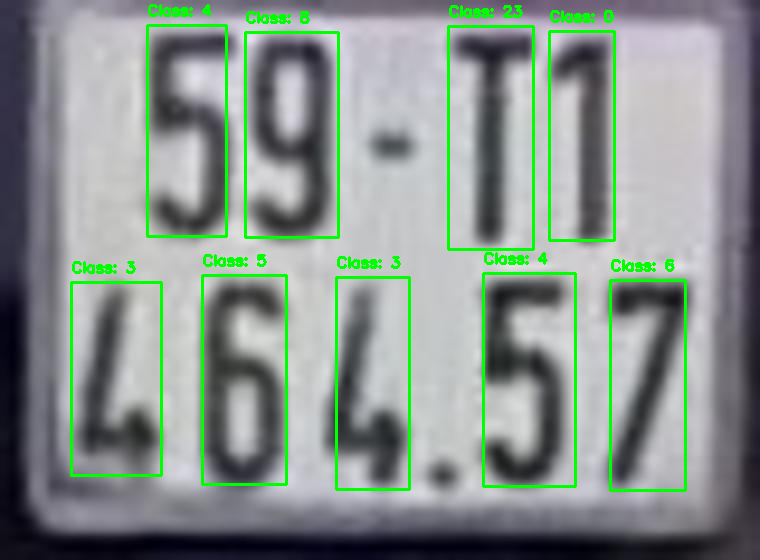

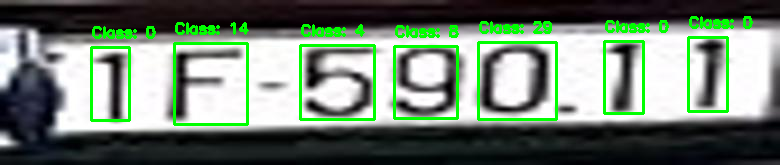

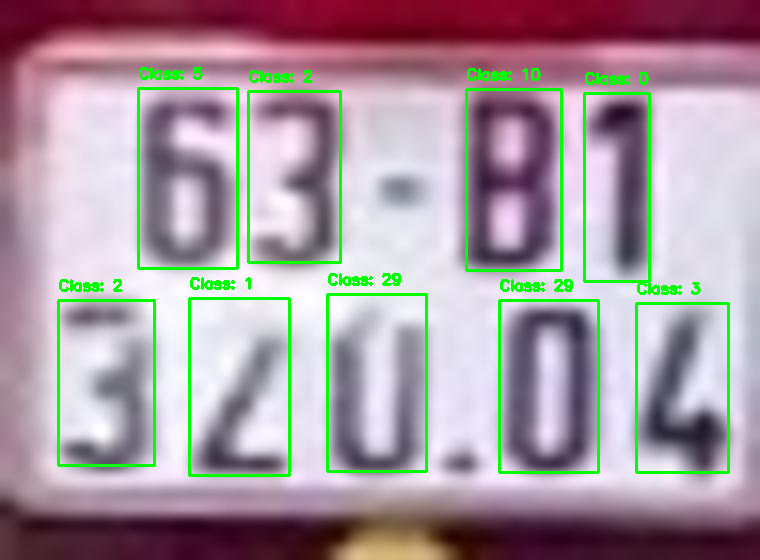

In [ ]:
folder_path = "/content/drive/MyDrive/Advanced_Deep_Learning/Midterm/Data/OCR/OCR"
image_train_path = os.path.join(folder_path, "images/train")
label_train_path = os.path.join(folder_path, "labels/train")
image_files = os.listdir(image_train_path)
random.shuffle(image_files)
selected_images = []
for image_file in image_files:
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(label_train_path, label_file)
    if os.path.exists(label_path):
        selected_images.append((image_file, label_path))
    if len(selected_images) >= 12:
        break
for image_file, label_path in selected_images:
    image_path = os.path.join(image_train_path, image_file)
    image = cv2.imread(image_path)
    with open(label_path, "r") as f:
        lines = f.readlines()
    for line in lines:
        label_values = line.strip().split()
        class_id, x_center, y_center, width, height = map(float, label_values)
        img_height, img_width, _ = image.shape
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label_text = f"Class: {int(class_id)}"
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!nvidia-smi

Sun Oct 15 10:26:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 16008 (delta 22), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16008/16008), 14.68 MiB | 9.17 MiB/s, done.
Resolving deltas: 100% (10988/10988), done.


In [ ]:
%cd yolov5
%pip install -qr requirements.txt

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.7/641.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
# Train YOLOv5 detection
!python train.py --img 320 --batch 32 --epochs 30 --data /content/drive/MyDrive/Advanced_Deep_Learning/Midterm/LP_detection.yaml --weights yolov5m.pt --cache

train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/Advanced_Deep_Learning/Midterm/LP_detection.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch

In [ ]:
# Train YOLOv5 recognition
!python train.py --img 640 --batch 32 --epochs 30 --data /content/drive/MyDrive/Advanced_Deep_Learning/Midterm/Letter_detect.yaml --weights yolov5m.pt --cache

train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/Advanced_Deep_Learning/Midterm/Letter_detect.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

In [ ]:
import math

In [ ]:
def changeContrast(img):
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l_channel)
    limg = cv2.merge((cl,a,b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced_img

In [ ]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [ ]:
def compute_skew(src_img, center_thres):
    if len(src_img.shape) == 3:
        h, w, _ = src_img.shape
    elif len(src_img.shape) == 2:
        h, w = src_img.shape
    else:
        print('upsupported image type')
    img = cv2.medianBlur(src_img, 3)
    edges = cv2.Canny(img,  threshold1 = 30,  threshold2 = 100, apertureSize = 3, L2gradient = True)
    lines = cv2.HoughLinesP(edges, 1, math.pi/180, 30, minLineLength=w / 1.5, maxLineGap=h/3.0)
    if lines is None:
        return 1

    min_line = 100
    min_line_pos = 0
    for i in range (len(lines)):
        for x1, y1, x2, y2 in lines[i]:
            center_point = [((x1+x2)/2), ((y1+y2)/2)]
            if center_thres == 1:
                if center_point[1] < 7:
                    continue
            if center_point[1] < min_line:
                min_line = center_point[1]
                min_line_pos = i

    angle = 0.0
    nlines = lines.size
    cnt = 0
    for x1, y1, x2, y2 in lines[min_line_pos]:
        ang = np.arctan2(y2 - y1, x2 - x1)
        if math.fabs(ang) <= 30: # excluding extreme rotations
            angle += ang
            cnt += 1
    if cnt == 0:
        return 0.0
    return (angle / cnt)*180/math.pi

In [ ]:
def deskew(src_img, change_cons, center_thres):
    if change_cons == 1:
        return rotate_image(src_img, compute_skew(changeContrast(src_img), center_thres))
    else:
        return rotate_image(src_img, compute_skew(src_img, center_thres))


In [ ]:
def linear_equation(x1, y1, x2, y2):
    b = y1 - (y2 - y1) * x1 / (x2 - x1)
    a = (y1 - b) / x1
    return a, b

def check_point_linear(x, y, x1, y1, x2, y2):
    a, b = linear_equation(x1, y1, x2, y2)
    y_pred = a*x+b
    return(math.isclose(y_pred, y, abs_tol = 3))

In [ ]:
def read_plate(yolo_license_plate, im):
    LP_type = "1"
    results = yolo_license_plate(im)
    bb_list = results.pandas().xyxy[0].values.tolist()
    if len(bb_list) == 0 or len(bb_list) < 7 or len(bb_list) > 10:
        return "unknown"
    center_list = []
    y_mean = 0
    y_sum = 0
    for bb in bb_list:
        x_c = (bb[0]+bb[2])/2
        y_c = (bb[1]+bb[3])/2
        y_sum += y_c
        center_list.append([x_c,y_c,bb[-1]])

    # find 2 point to draw line
    l_point = center_list[0]
    r_point = center_list[0]
    for cp in center_list:
        if cp[0] < l_point[0]:
            l_point = cp
        if cp[0] > r_point[0]:
            r_point = cp
    for ct in center_list:
        if l_point[0] != r_point[0]:
            if (check_point_linear(ct[0], ct[1], l_point[0], l_point[1], r_point[0], r_point[1]) == False):
                LP_type = "2"

    y_mean = int(int(y_sum) / len(bb_list))
    size = results.pandas().s

    # 1 line plates and 2 line plates
    line_1 = []
    line_2 = []
    license_plate = ""
    if LP_type == "2":
        for c in center_list:
            if int(c[1]) > y_mean:
                line_2.append(c)
            else:
                line_1.append(c)
        for l1 in sorted(line_1, key = lambda x: x[0]):
            license_plate += str(l1[2])
        license_plate += "-"
        for l2 in sorted(line_2, key = lambda x: x[0]):
            license_plate += str(l2[2])
    else:
        for l in sorted(center_list, key = lambda x: x[0]):
            license_plate += str(l[2])
    return license_plate

In [ ]:
from PIL import Image
import torch
from IPython.display import display

In [ ]:
yolo_LP_detect = torch.hub.load('/content/yolov5', 'custom', path='/content/drive/MyDrive/Advanced_Deep_Learning/Midterm/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('/content/yolov5', 'custom', path='/content/drive/MyDrive/Advanced_Deep_Learning/Midterm/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 290 layers, 20970123 parameters, 0 gradients, 48.2 GFLOPs
Adding AutoShape... 


In [ ]:
img_file = "/content/drive/MyDrive/Advanced_Deep_Learning/Midterm/Data/Data_test/th (7).jfif"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

In [ ]:
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = read_plate(yolo_license_plate, deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break

{'47B2-30259'}


<ipython-input-36-3b3717e2d4f8>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


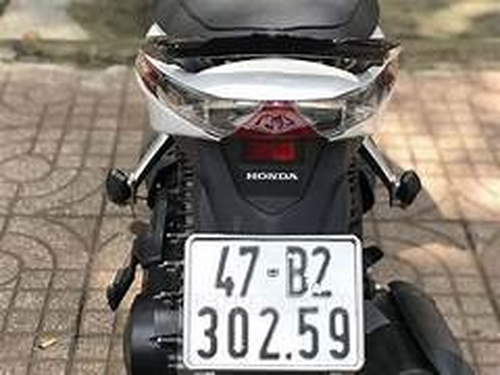

In [ ]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

{'29E1-45678'}


<ipython-input-58-3b3717e2d4f8>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


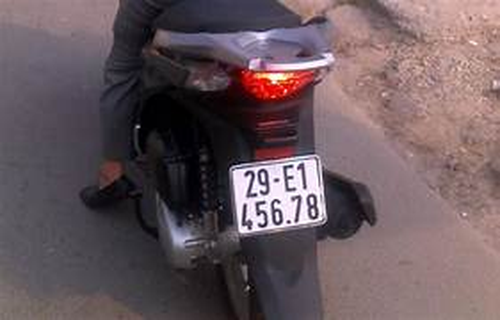

In [ ]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

{'34A08888'}


<ipython-input-51-3b3717e2d4f8>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


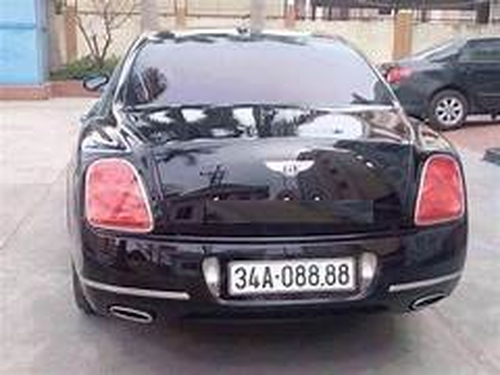

In [ ]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

{'29LD00143'}


<ipython-input-42-3b3717e2d4f8>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


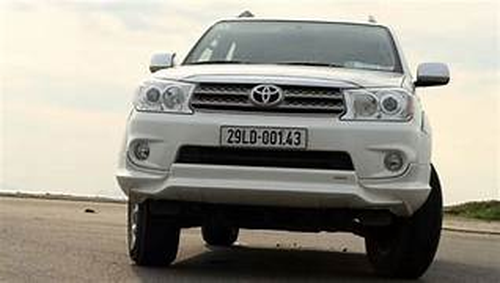

In [ ]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

{'59D1-22222', '65H-0999', '77H7-7777', '17B1-88888', '23F4-56789', '89K9-8989'}


<ipython-input-39-3b3717e2d4f8>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


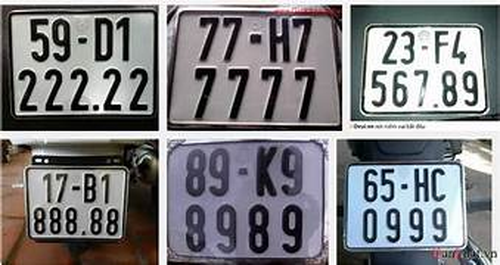

In [ ]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

set()


<ipython-input-55-3b3717e2d4f8>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


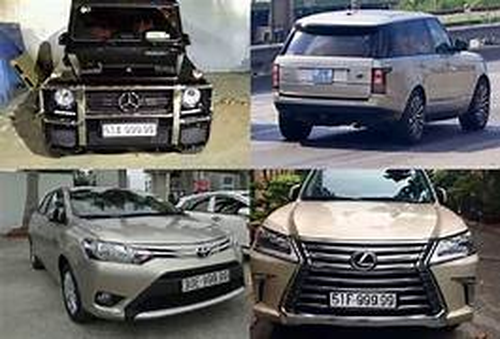

In [ ]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)